<!-- <div style='float:right'><img width=200 src="hse-logo.jpg" alt="HSE logo"></img></div> -->
<div style='float:left'><img width=400 src="python_logo.png" alt="Python"></img></div>

<div style='float:right'>

<h1 align='center'>Язык программирования Python</h1>

<h2 align='right'>Бобер Станислав Алексеевич</h2>
<h3 align='right'>Ст. преп. Департамента Прикладной Математики</h3>
<h3 align='right'>e-mail: sbober@hse.ru, stas.bober@gmail.com</h3>
</div>


<h1 align='center'>Лекция 4. Модуль Matplotlib</h1>

### Подключение модуля

In [1]:
# подключение модуля и сокращение названия для удобства
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# для отображения статических графиков прямо в ноутбуке
%matplotlib inline


### Первый график

In [2]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
dx = np.pi/4 # смещение

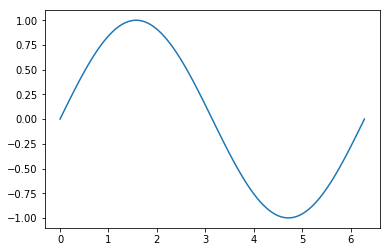

In [3]:
plt.plot(x, y)

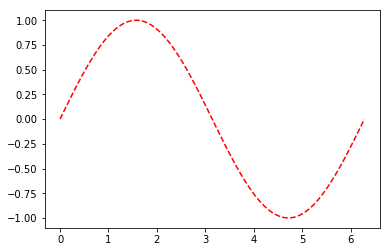

In [4]:
# быстрые стили
# '--' означает пунктир
# 'r' означает красный цвет

plt.plot(x, y, '--r')

### Стиль линии

In [5]:
matplotlib.lines.Line2D.lineStyles

{'-': '_draw_solid',
 '--': '_draw_dashed',
 '-.': '_draw_dash_dot',
 ':': '_draw_dotted',
 'None': '_draw_nothing',
 ' ': '_draw_nothing',
 '': '_draw_nothing'}

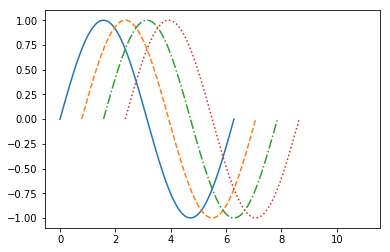

In [6]:
linestyles = list(matplotlib.lines.Line2D.lineStyles)

for i, style in enumerate(linestyles):
    plt.plot(x+i*dx, y, ls=style)

### Ширина линии

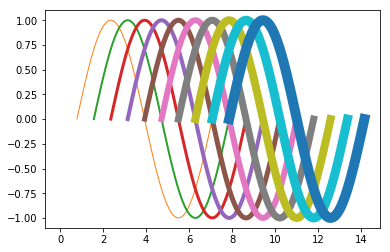

In [7]:
linewidths = np.linspace(0, 10, 11)

for i, w in enumerate(linewidths):
    plt.plot(x+i*dx, y, lw=w)

### Цвет линии

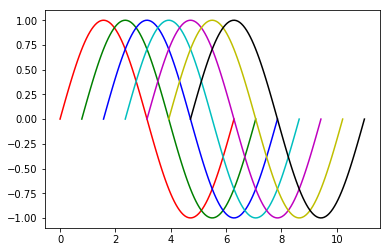

In [8]:
colors = 'rgbcmyk'

for i, c in enumerate(colors):
    plt.plot(x+i*dx, y, color=c)

### Маркеры

In [9]:
print(matplotlib.lines.Line2D.markers)

{'.': 'point', ',': 'pixel', 'o': 'circle', 'v': 'triangle_down', '^': 'triangle_up', '<': 'triangle_left', '>': 'triangle_right', '1': 'tri_down', '2': 'tri_up', '3': 'tri_left', '4': 'tri_right', '8': 'octagon', 's': 'square', 'p': 'pentagon', '*': 'star', 'h': 'hexagon1', 'H': 'hexagon2', '+': 'plus', 'x': 'x', 'D': 'diamond', 'd': 'thin_diamond', '|': 'vline', '_': 'hline', 'P': 'plus_filled', 'X': 'x_filled', 0: 'tickleft', 1: 'tickright', 2: 'tickup', 3: 'tickdown', 4: 'caretleft', 5: 'caretright', 6: 'caretup', 7: 'caretdown', 8: 'caretleftbase', 9: 'caretrightbase', 10: 'caretupbase', 11: 'caretdownbase', 'None': 'nothing', None: 'nothing', ' ': 'nothing', '': 'nothing'}


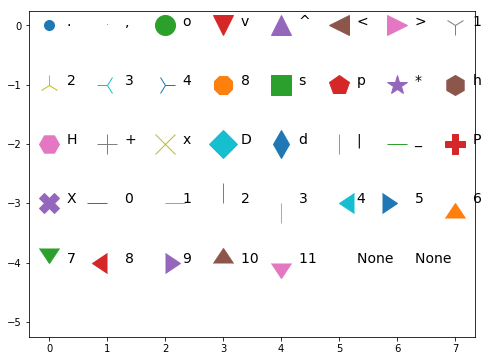

In [10]:
plt.figure(figsize=(8,6))
markers = list(matplotlib.lines.Line2D.markers)
n = len(markers)
cols = 8

for i in range(n):
    row, col = i // cols, i % cols
    plt.plot(col, -row, marker=markers[i], markersize=20)
    plt.text(col, -row, ' '*4+str(markers[i]), fontsize=14)

### Настройки маркера

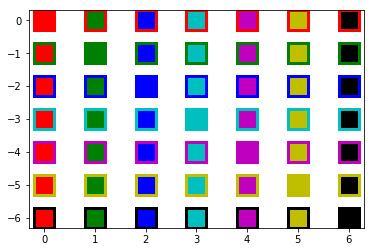

In [11]:
# markeredgecolor - цвет границы маркера
# markerfacecolor - цвет маркера
# markeredgewidth - толщина границы маркера

colors = 'rgbcmyk'
n = len(colors)
for i in range(n):
    for j in range(n):
        plt.plot(i, -j, marker='s', markersize=20, markeredgewidth=3,
                 markerfacecolor=colors[i], markeredgecolor=colors[j])


### Figures and Axes

В matplotlib принята следующая структура:
    
    Figure - рисунок, внутри которого располагаются Axes - оси;
    
    Axes - оси, внутри которых происходит преобразование и отрисовка графиков.
    
Для простых случаев (один график на одном рисунке) удобно пользоваться текущим рисунком:

    plt.plot(...)
    plt.scatter(...)
    plt.contour(...)
    
Получить ссылку на текущий рисунок:

    f = plt.gcf() # get current figure

Получить ссылку на оси текущего рисунка:

    a = plt.gca() # get current axes
    

### Рисунок - Figure

In [12]:
# создать новый рисунок
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [13]:
# figsize - размер рисунка в дюймах
# dpi - точек на дюйм (dots per inch)

plt.figure(figsize = (10,10), dpi=100);

<Figure size 1000x1000 with 0 Axes>

In [14]:
fig = plt.figure(figsize = (10,10), dpi=100)
ax = fig.add_axes()

<Figure size 1000x1000 with 0 Axes>

### Subplots

(<Figure size 576x576 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002726D488748>,
       dtype=object))

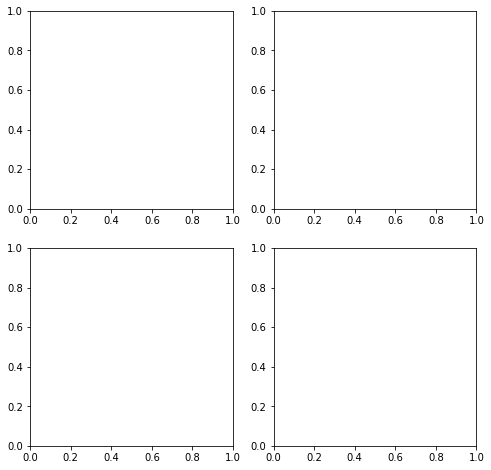

In [15]:
# рисунок и двумерный массив из ссылок на оси
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
fig, ax

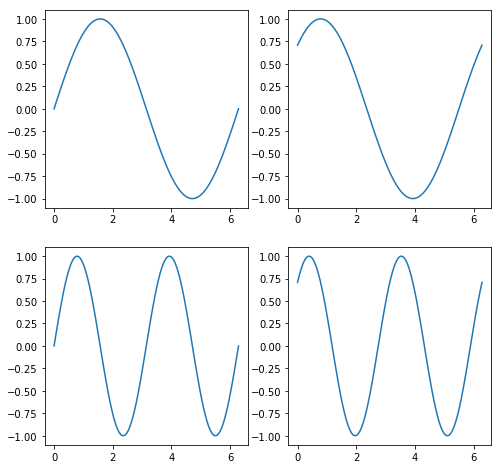

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
fig, ax

for i in range(2):
    for j in range(2):
        ax[i,j].plot(x, np.sin((i+1)*x+j*dx))

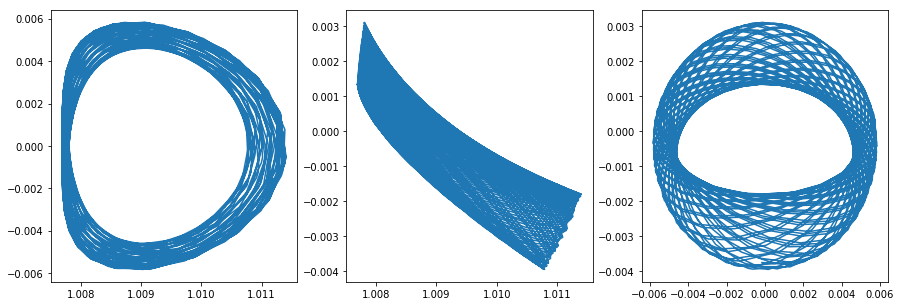

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
arr = np.loadtxt('traj.txt')

dims = [(0,1),(0,2),(1,2)]

for i, dim in enumerate(dims):
    ax[i].plot(arr[:,dim[0]], arr[:,dim[1]])

### Засечки - Ticks

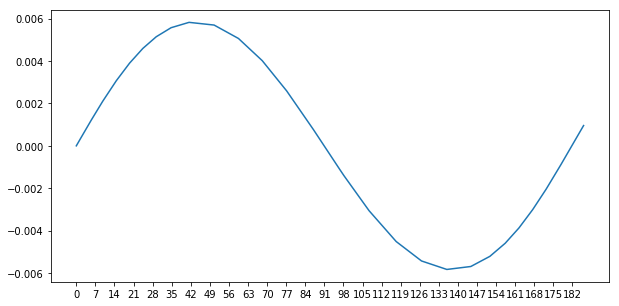

In [18]:
plt.figure(figsize=(10,5))
n = 30
T = arr[:n,-1]*365/(2*np.pi)
ticks = np.arange(T[0], T[-1], 7)
plt.plot(T, arr[:n,1])
plt.xticks(ticks);

In [19]:
# подписи к осям
import datetime
T0 = datetime.datetime.fromisoformat('2020-05-12 00:00:00')
ticklabels = [str(T0+datetime.timedelta(days=i)) for i in ticks]
print(ticklabels)

['2020-05-12 00:00:00', '2020-05-19 00:00:00', '2020-05-26 00:00:00', '2020-06-02 00:00:00', '2020-06-09 00:00:00', '2020-06-16 00:00:00', '2020-06-23 00:00:00', '2020-06-30 00:00:00', '2020-07-07 00:00:00', '2020-07-14 00:00:00', '2020-07-21 00:00:00', '2020-07-28 00:00:00', '2020-08-04 00:00:00', '2020-08-11 00:00:00', '2020-08-18 00:00:00', '2020-08-25 00:00:00', '2020-09-01 00:00:00', '2020-09-08 00:00:00', '2020-09-15 00:00:00', '2020-09-22 00:00:00', '2020-09-29 00:00:00', '2020-10-06 00:00:00', '2020-10-13 00:00:00', '2020-10-20 00:00:00', '2020-10-27 00:00:00', '2020-11-03 00:00:00', '2020-11-10 00:00:00']


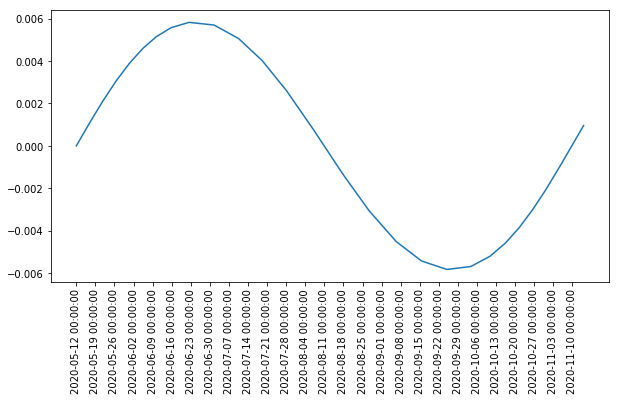

In [20]:
plt.figure(figsize=(10,5))
n = 30
T = arr[:n,-1]*365/(2*np.pi)
ticks = np.arange(T[0], T[-1], 7)
plt.plot(T, arr[:n,1])
plt.xticks(ticks);
plt.gca().set_xticklabels(ticklabels, rotation=90);

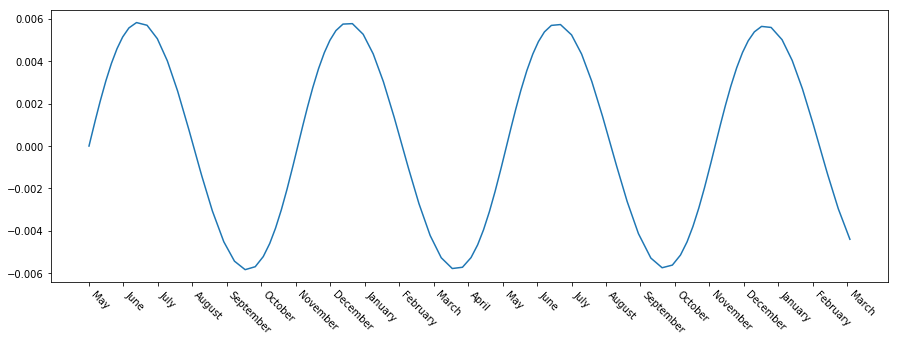

In [21]:
plt.figure(figsize=(15,5))
n = 100
T = arr[:n,-1]*365/(2*np.pi)
plt.plot(T, arr[:n,1])
ticks = np.arange(T[0], T[-1], 30)
plt.xticks(ticks);
ticklabels = [(T0+datetime.timedelta(days=i)).strftime('%B') for i in ticks]
plt.gca().set_xticklabels(ticklabels, horizontalalignment='left', rotation=-45);

### Подписи - Labels

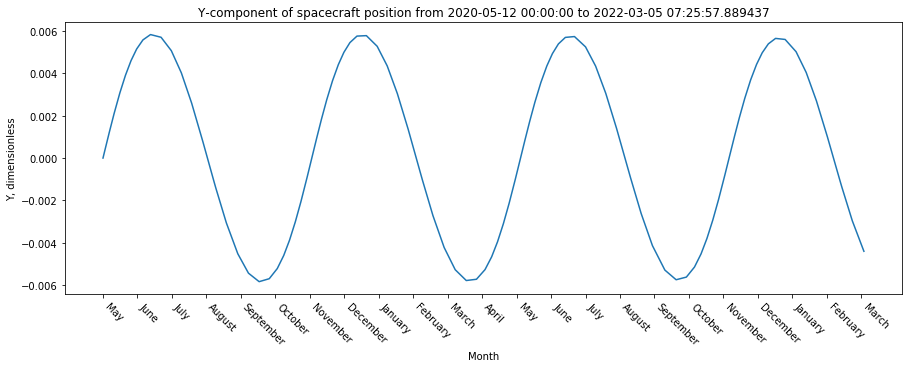

In [22]:
plt.figure(figsize=(15,5))
n = 100
T = arr[:n,-1]*365/(2*np.pi)
plt.plot(T, arr[:n,1])
ticks = np.arange(T[0], T[-1], 30)
plt.xticks(ticks);
ticklabels = [(T0+datetime.timedelta(days=i)).strftime('%B') for i in ticks]
plt.gca().set_xticklabels(ticklabels, horizontalalignment='left', rotation=-45)

plt.xlabel('Month')
plt.ylabel('Y, dimensionless')
plt.title('Y-component of spacecraft position from %s to %s'%(T0+datetime.timedelta(days=T[0]), T0+datetime.timedelta(days=T[-1])));

### Легенда - Legend

    Положение легенды
    ‘best’ = 0
    ‘upper right’ = 1
    ‘upper left’ = 2
    ‘lower left’ = 3
    ‘lower right’ = 4
    ‘right’ = 5
    ‘center left’ = 6
    ‘center right’ = 7
    ‘lower center’ = 8
    ‘upper center’ = 9
    ‘center’ = 10

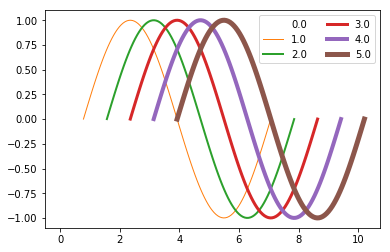

In [23]:
linewidths = np.linspace(0, 5, 6)

for i, w in enumerate(linewidths):
    plt.plot(x+i*dx, y, lw=w, label=str(w))
    
plt.legend(loc='upper right', ncol=2)

### scatter

In [24]:
import numpy.random as npr

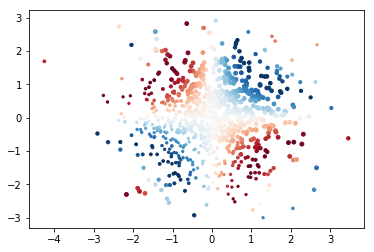

In [25]:
x = npr.randn(30, 30)
y = npr.randn(30, 30)
s = 10*(1+0.5*np.sin(x+y))
c = np.sin(x*y)
plt.scatter(x, y, c=c, s=s, cmap='RdBu')

### contour

In [26]:
x = np.linspace(0, 5, 100)
y = np.linspace(0, 2, 100)
x.shape, y.shape

((100,), (100,))

In [27]:
X, Y = np.meshgrid(x,y)
X.shape, Y.shape

((100, 100), (100, 100))

In [28]:
Z = np.sin(X**2 + Y**2)
Z.shape

(100, 100)

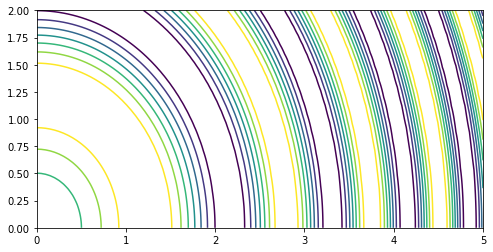

In [29]:
plt.figure(figsize=(8, 4))
plt.contour(X, Y, Z)

### contourf

In [30]:
# посмотреть названия цветовых карт
print(plt.colormaps())

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r',

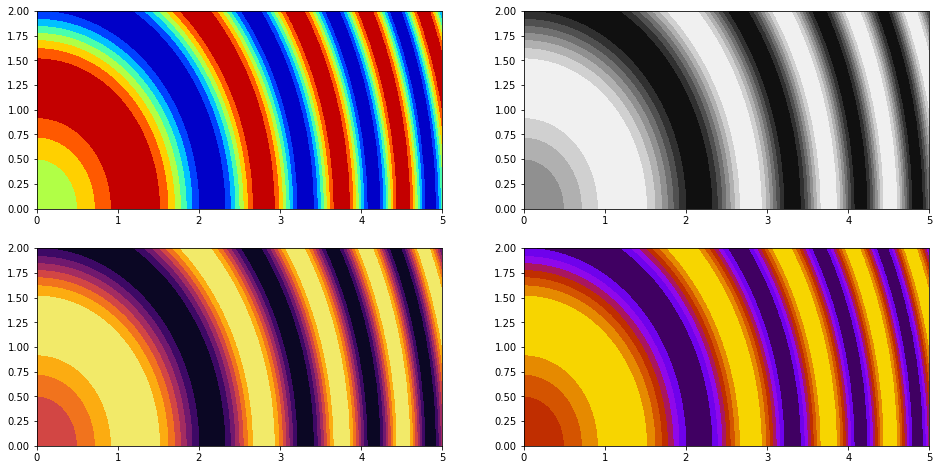

In [31]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))
fig, ax

cmaps = [['jet', 'gray'], ['inferno', 'gnuplot']]

for i in range(2):
    for j in range(2):
        ax[i,j].contourf(X, Y, Z, cmap=cmaps[i][j])
        

### tricontourf

In [32]:
nodes = npr.rand(500, 2)
nodes.shape

(500, 2)

In [33]:
from scipy.spatial import Delaunay
tri = Delaunay(nodes)

In [34]:
elems = tri.simplices

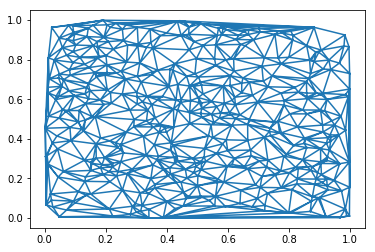

In [35]:
plt.triplot(nodes[:,0], nodes[:,1], elems);

In [36]:
z = np.sin(nodes[:,0]**2+nodes[:,1]**2)

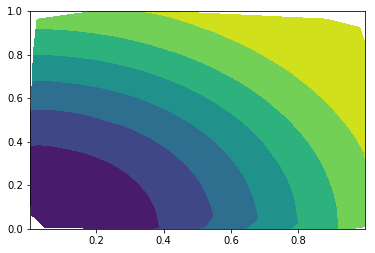

In [37]:
plt.tricontourf(nodes[:,0], nodes[:,1], elems, z)

### %matplotlib notebook

In [41]:
%matplotlib notebook
# интерактивный режим
# можно увеличивать кусочки графика
# чтобы выключить интерактивный режим для графика, надо нажать на синюю кнопку выключения

<IPython.core.display.Javascript object>


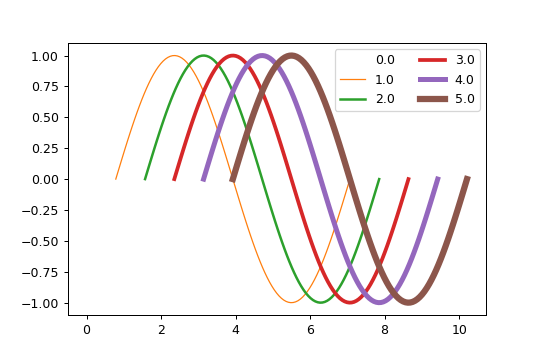

In [42]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
dx = np.pi/4 # смещение
linewidths = np.linspace(0, 5, 6)

for i, w in enumerate(linewidths):
    plt.plot(x+i*dx, y, lw=w, label=str(w))
    
plt.legend(loc='upper right', ncol=2)

### Анимация

<IPython.core.display.Javascript object>


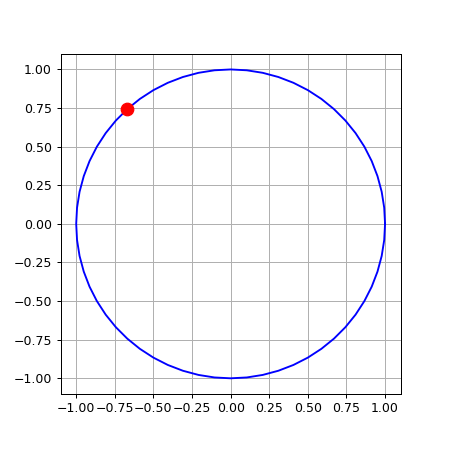

In [43]:
import matplotlib.animation as animation
import time

fig, ax = plt.subplots(figsize=(5,5))
ax.set_ylim(-1.1, 1.1)
ax.set_xlim(-1.1, 1.1)
ax.grid()
ax.set_aspect(1)
phi = np.linspace(0, 360, 61)
x = np.cos(np.radians(phi))
y = np.sin(np.radians(phi))
line, = ax.plot(x, y, 'b')
point, = ax.plot(x[0], y[0], '.r', ms=20)

def animate(i):
    # update the data
    point.set_xdata(x[i])
    point.set_ydata(y[i])


ani = animation.FuncAnimation(fig, animate, interval=120, frames=phi.shape[0],
                              repeat=True)
plt.show()

## Вопросы и дополнения к лекции


[Scientific Python Lectures](https://github.com/jrjohansson/scientific-python-lectures)

[100 Numpy Exercises](https://github.com/rougier/numpy-100/blob/master/100_Numpy_exercises_no_solution.ipynb)